In [27]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go 

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)

df_music2 = df_music.copy()
df_music2.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [28]:
df_music2.drop(columns=['time_signature', 'key', 'track_id',], inplace=True)

In [29]:
df_music2[(df_music2['genre'] == 'Children’s Music') | (df_music2['genre'] == "Children's Music")]

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
71649,Children's Music,Toddler Tunes,Itsy Bitsy Spider,47,0.302000,0.901,137454,0.526,0.000000,0.0540,-7.296,Minor,0.0362,109.946,0.706
71650,Children's Music,Spongebob Squarepants,The Best Day Ever,47,0.202000,0.565,182173,0.758,0.000000,0.0552,-5.205,Major,0.0294,127.817,0.605
71651,Children's Music,Blippi,The Excavator Song,46,0.528000,0.737,175187,0.549,0.000087,0.2990,-13.215,Major,0.0382,124.980,0.840
71652,Children's Music,Pinkfong,Baby Shark Music Box,44,0.688000,0.686,110523,0.121,0.885000,0.0793,-20.751,Major,0.1030,148.002,0.818
71653,Children's Music,Toddler Tunes,"Head, Shoulders, Knees and Toes",47,0.249000,0.867,83291,0.729,0.000000,0.0802,-6.616,Major,0.0373,120.129,0.793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104017,Children’s Music,Smash Mouth,Then The Morning Comes,46,0.024000,0.736,182267,0.868,0.000000,0.0735,-4.972,Minor,0.0289,118.599,0.961
104018,Children’s Music,Built To Spill,Liar,52,0.266000,0.537,311347,0.755,0.090100,0.2620,-8.187,Major,0.0269,134.879,0.538
104019,Children’s Music,Moon Taxi,Let The Record Play,44,0.004400,0.672,188667,0.855,0.160000,0.1670,-4.293,Minor,0.0785,166.025,0.779
104020,Children’s Music,Rend Collective,Every Giant Will Fall,49,0.019800,0.551,225320,0.847,0.000000,0.1320,-6.909,Major,0.0456,111.975,0.445


In [30]:
df_music2.drop(df_music2[(df_music2['genre'] == 'Soundtrack') | (df_music2['genre'] == 'Movie')].index, inplace=True)
df_music2 = df_music2.reset_index(drop=True)

In [31]:
df_music2['genre'].replace("Children’s Music", "Children's Music", inplace=True)

In [32]:
#transform ms en s
df_music2['duration_ms'] = round(df_music2['duration_ms']/1000,2)

In [33]:
#rename columns ms
df_music2.rename(columns={'duration_ms':'duration_sec'},inplace=True)


In [34]:
Percent_popularity_genre = round(((df_music2.value_counts('genre', 'popularity'))*100),3)

Percent_genre_danceability = round(((df_music2.value_counts('genre', 'danceability'))*100),3)

popularity_genre = round(df_music2.groupby(by=['genre']).mean('popularity'),2).sort_values(['popularity'], ascending=False).reset_index()

best_genre_valence = round(df_music2.groupby(by=['genre']).mean('valence'),2).sort_values(['valence'], ascending=False).reset_index()

best_popularity_valence = round(df_music2.groupby(by=['genre','popularity']).mean('valence')*100,2).sort_values(['valence', 'popularity'], ascending=False).reset_index()[:11]

In [35]:
best_popularity_valence = best_popularity_valence[['valence','popularity','danceability','duration_sec','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo'	]]
best_popularity_valence 


,valence,popularity,danceability,duration_sec,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,98.0,79,69.7,21483.0,11.40,80.9,0.05,18.30,-819.70,3.02,12594.10
1,96.5,83,73.3,23960.0,14.50,71.0,11.50,9.56,-584.90,2.92,12797.50
2,93.4,9,47.5,26639.0,68.00,62.6,0.00,11.80,-859.60,24.90,17004.00
3,92.7,75,71.9,17293.0,9.12,51.5,0.00,7.91,-972.00,34.80,7651.80
4,91.9,55,73.8,5851.0,90.70,53.1,0.00,31.10,-735.00,14.00,17000.70
5,91.8,36,61.3,17148.0,1.69,87.6,11.10,10.50,-481.10,3.47,12402.40
6,91.4,5,71.8,14092.0,47.60,83.1,0.00,23.30,-539.00,10.80,20003.90
7,91.3,97,76.0,15804.0,55.60,47.9,0.00,7.03,-557.40,4.66,8991.10
8,89.0,76,73.4,18478.5,2.22,80.0,0.36,8.82,-793.45,5.28,12292.55
9,88.9,92,79.0,19000.0,43.70,63.1,0.00,15.80,-554.90,4.25,9403.90


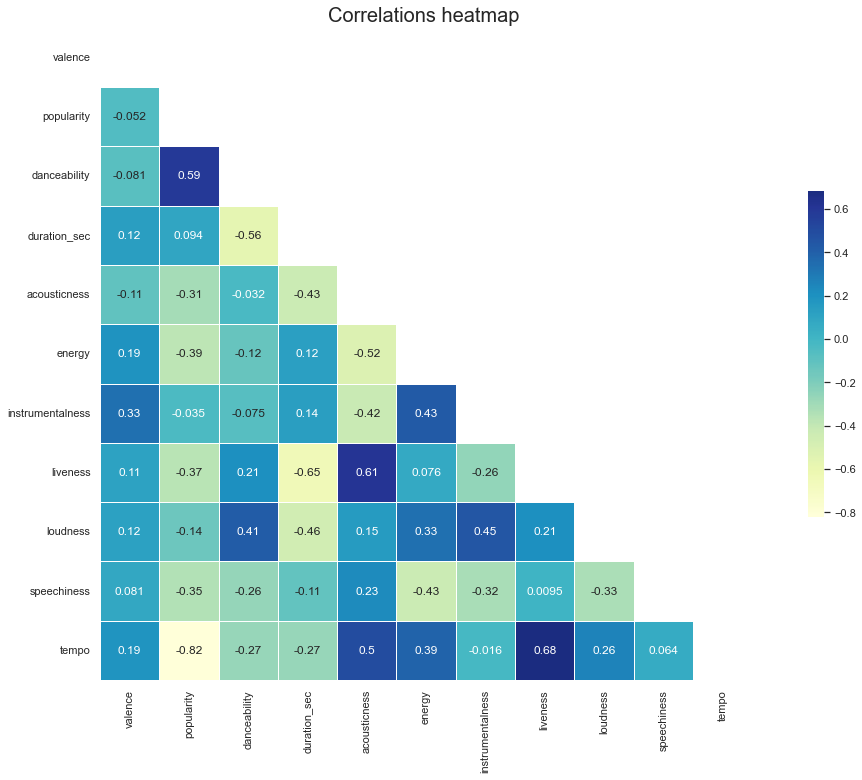

In [36]:
bc = best_popularity_valence.corr()

plt.subplots(figsize=(20, 12))

#style
sns.set_theme(style="white")

#heatmap with only direction
mask = np.triu(np.ones_like(bc, dtype=bool))

# heatmap
sns.heatmap(bc,              
            cmap="YlGnBu",              
            mask=mask,
            center=0,                   
            square=True,                
            linewidths=.5,              
            annot=True,                            
            cbar_kws={"shrink": .5})    

plt.title('Correlations heatmap ', size = 20)

plt.show()

In [37]:
fig = go.Figure() 


fig.add_trace(go.Scatter(x=best_popularity_valence.valence, 
                    y=best_popularity_valence.energy, 
                    name="*valence_popularity",
                    
                    line_color='green'))


fig.add_trace(go.Scatter(x=best_popularity_valence.valence, 
                    y=best_popularity_valence.acousticness,
                    name="valence_acousticness",
                    
                    line_color='rgb(231,107,243)'))

fig.update_layout(title ='<b>Graph<b>',
                    title_x = 0.5,                    
                    width=1300,
                    height=600,
                    legend_title="***",
                    template='plotly_dark',
                    font_size=13
                    )

fig.show()

In [40]:
best_genre_valence

,genre,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Reggae,35.59,0.19,0.70,239.50,0.64,0.04,0.19,-7.52,0.12,118.16,0.68
1,Reggaeton,37.74,0.22,0.73,232.04,0.75,0.00,0.21,-5.88,0.13,120.99,0.66
2,Ska,28.61,0.10,0.53,191.55,0.82,0.06,0.24,-6.17,0.09,129.43,0.65
3,Blues,34.74,0.33,0.53,251.93,0.61,0.10,0.23,-9.05,0.06,121.14,0.58
4,Country,46.10,0.27,0.58,217.24,0.64,0.01,0.19,-7.34,0.05,123.41,0.54
5,Children's Music,36.20,0.32,0.60,199.66,0.59,0.09,0.18,-8.40,0.10,121.64,0.53
6,Dance,57.28,0.15,0.64,226.26,0.70,0.04,0.19,-6.05,0.08,120.80,0.52
7,Rock,59.62,0.20,0.54,237.00,0.68,0.05,0.19,-7.29,0.05,122.63,0.52
8,Jazz,40.82,0.50,0.59,265.65,0.47,0.36,0.17,-11.21,0.07,111.78,0.51
9,Pop,66.59,0.22,0.64,220.86,0.64,0.02,0.18,-6.50,0.11,121.18,0.48


In [41]:
popularity_genre

,genre,popularity,acousticness,danceability,duration_sec,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Pop,66.59,0.22,0.64,220.86,0.64,0.02,0.18,-6.50,0.11,121.18,0.48
1,Rap,60.53,0.17,0.70,219.85,0.65,0.01,0.20,-6.67,0.19,121.10,0.46
2,Rock,59.62,0.20,0.54,237.00,0.68,0.05,0.19,-7.29,0.05,122.63,0.52
3,Hip-Hop,58.42,0.18,0.72,219.98,0.64,0.01,0.20,-6.86,0.21,120.79,0.47
4,Dance,57.28,0.15,0.64,226.26,0.70,0.04,0.19,-6.05,0.08,120.80,0.52
5,Indie,54.70,0.33,0.57,224.15,0.58,0.09,0.17,-7.92,0.07,119.29,0.43
6,R&B,52.31,0.29,0.64,225.75,0.56,0.03,0.18,-7.60,0.12,116.37,0.45
7,Alternative,50.21,0.16,0.54,233.24,0.71,0.06,0.20,-6.54,0.09,122.53,0.45
8,Folk,49.94,0.46,0.53,235.81,0.49,0.08,0.17,-9.87,0.05,118.75,0.44
9,Soul,47.03,0.36,0.62,234.71,0.53,0.06,0.18,-8.87,0.08,115.32,0.48


In [42]:
fig = px.scatter_polar(popularity_genre, r="popularity", theta="genre",
                       color="popularity", size="popularity",
                       color_continuous_scale=px.colors.diverging.Tealrose,
                        
                       template="plotly_dark")

fig.update_layout(autosize=False,
                    title='Popularity rate for each musical genre',
                    title_x = 0.1,                    
                    width=1000,
                    height=600,                    
                    template='plotly_dark',
                    font_size=13
                    )

fig.show()

In [43]:

fig = px.line_polar(popularity_genre, r="danceability", theta="genre", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",
                    )

fig.update_traces(fill='toself')

fig.update_layout(autosize=False, 
                    title='Danceability for each musical genre',
                    title_x = 0.1,                    
                    width=1000,
                    height=600,                    
                    template='plotly_dark',
                    font_size=13
                    )

fig.show()